In [ ]:
# необходимые библиотеки
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

import skimage

# Задача 1

## Чтение данных

In [ ]:
# получение токена для загрузки набора данных с сайта kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dashkabugashka","key":"120cb24fa13253988e528a5054fa0b13"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Oct 30 08:24 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kuchhbhi/latest-laptop-price-list

latest-laptop-price-list.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# разархивирование данных
!unzip "/content/latest-laptop-price-list.zip" -d "/content/laptop_data"

Archive:  /content/latest-laptop-price-list.zip
replace /content/laptop_data/Cleaned_Laptop_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Исследование данных

In [ ]:
df = pd.read_csv('/content/laptop_data/Cleaned_Laptop_data.csv') # читаем данные в перменную df
df.head() # выводим первые 5 строк

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
df.info() # информация о переменных в наборе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
# перевод категориальных переменных в числовые
df["brand"] = pd.CategoricalIndex(df["brand"]).codes
df["model"] = pd.CategoricalIndex(df["model"]).codes
df["processor_brand"] = pd.CategoricalIndex(df["processor_brand"]).codes
df["processor_name"] = pd.CategoricalIndex(df["processor_name"]).codes
df["processor_gnrtn"] = pd.CategoricalIndex(df["processor_gnrtn"]).codes
df["ram_gb"] = pd.CategoricalIndex(df["ram_gb"]).codes
df["ram_type"] = pd.CategoricalIndex(df["ram_type"]).codes
df["ssd"] = pd.CategoricalIndex(df["ssd"]).codes
df["hdd"] = pd.CategoricalIndex(df["hdd"]).codes
df["os"] = pd.CategoricalIndex(df["os"]).codes
df["os_bit"] = pd.CategoricalIndex(df["os_bit"]).codes
df["display_size"] = pd.CategoricalIndex(df["display_size"]).codes
df["Touchscreen"] = pd.CategoricalIndex(df["Touchscreen"]).codes
df["msoffice"] = pd.CategoricalIndex(df["msoffice"]).codes
df["weight"] = pd.CategoricalIndex(df["weight"]).codes

In [ ]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,8,11,0,0,0,2,1,0,1,2,...,15,0,0,0,24990,32790,23,3.7,63,12
1,8,59,0,1,0,2,1,0,3,2,...,15,0,0,0,19590,21325,8,3.6,1894,256
2,3,75,0,1,0,2,1,2,0,2,...,15,0,0,0,19990,27990,28,3.7,1153,159
3,3,75,0,1,0,2,1,2,0,2,...,15,0,0,0,21490,27990,23,3.7,1153,159
4,3,75,0,1,0,2,1,4,0,2,...,15,0,0,0,24990,33490,25,3.7,1657,234


In [ ]:
# cтандартизация матрицы признаков
features = StandardScaler().fit_transform(df)

In [ ]:
# создание объекта PCA, который сохранит 99% дисперсии
рса = PCA(n_components=0.99, whiten=True)
# анализ РСА
features_pca = рса.fit_transform(features)
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_pca.shape[1])

Исходное количество признаков: 23
Сокращенное количество признаков: 21


In [ ]:
# создание объекта PCA, который сохранит 95% дисперсии
рса = PCA(n_components=0.95, whiten=True)
# анализ РСА
features_pca = рса.fit_transform(features)
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_pca.shape[1])

Исходное количество признаков: 23
Сокращенное количество признаков: 18


# Задача 2

In [ ]:
# создание линейно неразделимых данных
undivided_features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

In [ ]:
# применение ядерного PCA c радиально-базисным функциональным ядром (RBF ядром)
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(undivided_features)
print("Исходное количество признаков:", undivided_features.shape[1])
print("Сокращенное количество признаков:", features_kpca.shape[1])

Исходное количество признаков: 2
Сокращенное количество признаков: 1


# Задача 3

In [ ]:
# функции для визуализации главных компонент
def visual_2d(X, y):
  plt.figure(2, figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
  plt.xlabel("Главная компонента 1")
  plt.ylabel("Главная компонента 2")
  plt.grid()

def visual_3d(X, y):
  fig = plt.figure(1, figsize=(8, 6))
  ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)
  ax.set_title("Три главные компоненты")
  ax.set_xlabel("Главная компонента 1")
  ax.xaxis.set_ticklabels([])
  ax.set_ylabel("Главная компонента 2")
  ax.yaxis.set_ticklabels([])
  ax.set_zlabel("Главная компонента 3")
  ax.zaxis.set_ticklabels([])
  plt.grid()

In [ ]:
df['ratings_qcut'] = pd.qcut(df['ratings'], 3, labels=[1, 2, 3]) # создание категориальной переменной из числовой, используя функцию qcut
df['latest_price_qcut'] = pd.qcut(df['latest_price'], 3, labels=[1, 2, 3])

In [ ]:
df['ratings_qcut'].value_counts()

1    316
3    299
2    281
Name: ratings_qcut, dtype: int64

In [ ]:
df['latest_price_qcut'].value_counts()

1    306
3    299
2    291
Name: latest_price_qcut, dtype: int64

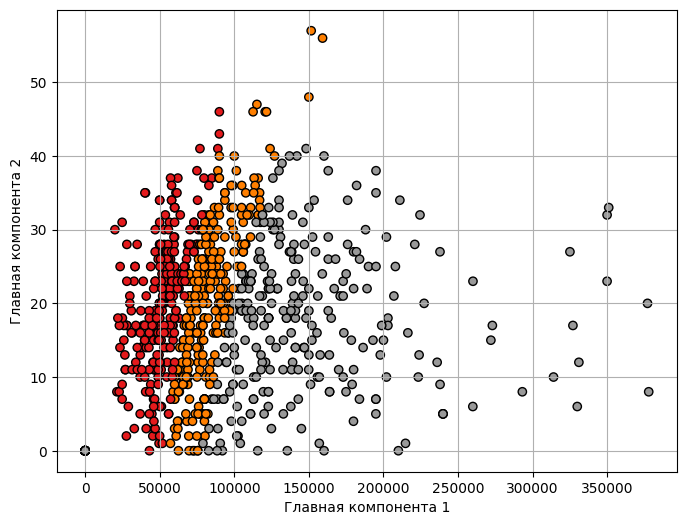

In [ ]:
visual_2d(X=np.asarray(df[["old_price", "discount"]]), y=df['latest_price_qcut'])

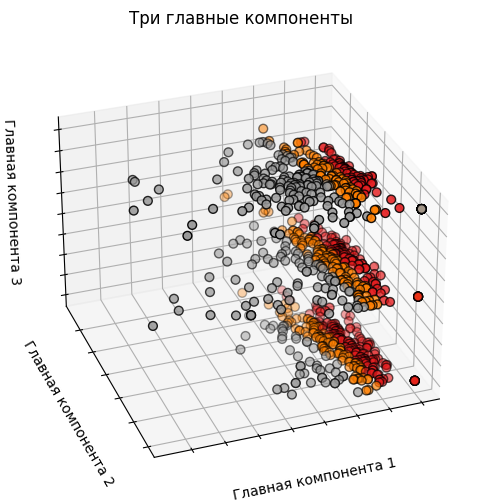

In [ ]:
visual_3d(X=np.asarray(df[["old_price", "discount", "ratings_qcut"]]), y=df["latest_price_qcut"])

# Задача 4

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/NN/grey_cat.jpg' # указываем путь до картинки

image = skimage.io.imread(path) # загружаем изображение
image = skimage.color.rgb2gray(image) # преобразовываем изображение в оттенки серого

In [ ]:
image.shape

(597, 895)

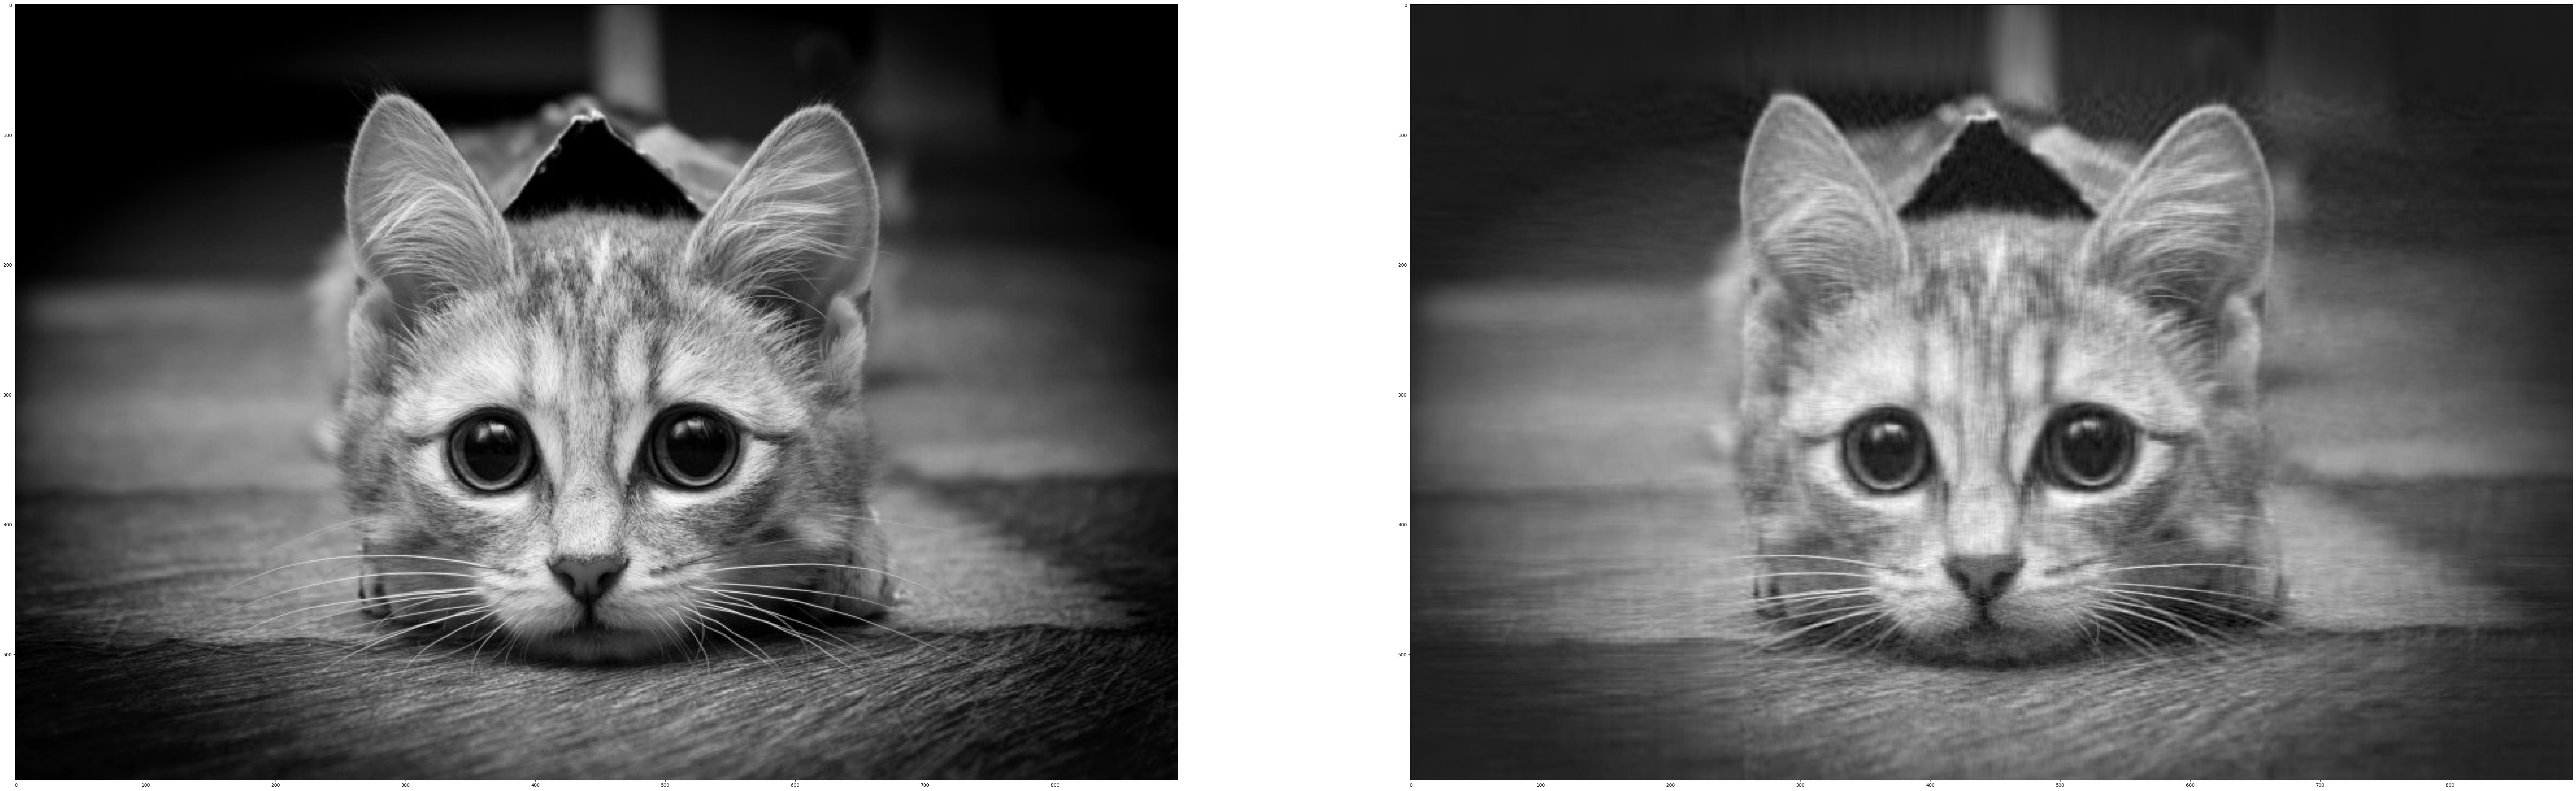

In [ ]:
pca = PCA(n_components=50) # создание объекта PCA, который сохранит 50 компонент и применим к картинке
image_compressed = pca.fit_transform(image)
image_decompressed = pca.inverse_transform(image_compressed)

# сравним сжатое и оригинальное изображания
fig, axes = plt.subplots(1,2, figsize=(100, 100))
axes[0].imshow(image, cmap='gray')
axes[0].set_label("Оригинальное изображение")
axes[1].imshow(image_decompressed, cmap='gray')
axes[1].set_label("Сжатое изображение")

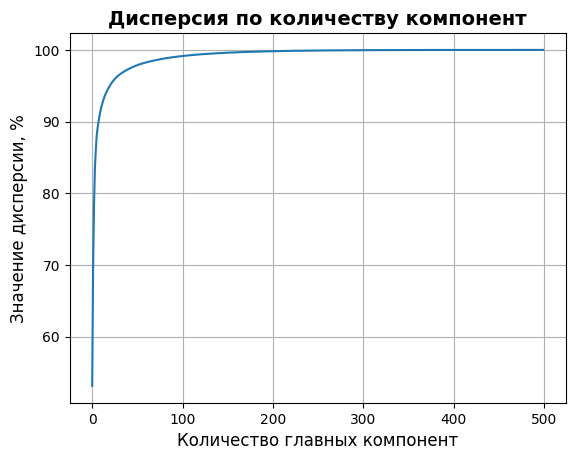

In [ ]:
# Посчитаем первые 500 главных компонент
pca = PCA(n_components=500).fit(image)

# Посчитаем дисперсию для каждого количества компонент
explained_variance = pca.explained_variance_ratio_
components = [i for i in range(0, len(explained_variance))]

# переведем дисперсию в проценты
explained_variance_percent = [100 * i for i in explained_variance]

# построим график значения дисперсии от количества гланых компонент
plt.plot(components, np.cumsum(explained_variance_percent))
plt.title("Дисперсия по количеству компонент", fontsize=14, fontweight="bold")
plt.xlabel("Количество главных компонент", fontsize=12)
plt.ylabel("Значение дисперсии, %", fontsize=12)
plt.grid()

На графике видно, что при количество главных компонент около 150 дисперсия близка к 100%

In [ ]:
# посчитаем количество гланых компонент для описания выбранных дисперсий
for i in (.8, .9, .95, .99, .999):
  # создание объекта PCA, который сохранит 99% дисперсии
  рса = PCA(n_components=i, whiten=True)
  # анализ РСА
  features_pca = рса.fit_transform(image)
  print(f"Дисперсия: {i}, cокращенное количество признаков: {features_pca.shape[1]}")

Дисперсия: 0.8, cокращенное количество признаков: 4
Дисперсия: 0.9, cокращенное количество признаков: 8
Дисперсия: 0.95, cокращенное количество признаков: 21
Дисперсия: 0.99, cокращенное количество признаков: 92
Дисперсия: 0.999, cокращенное количество признаков: 238


Text(0.5, 1.0, 'Original image')

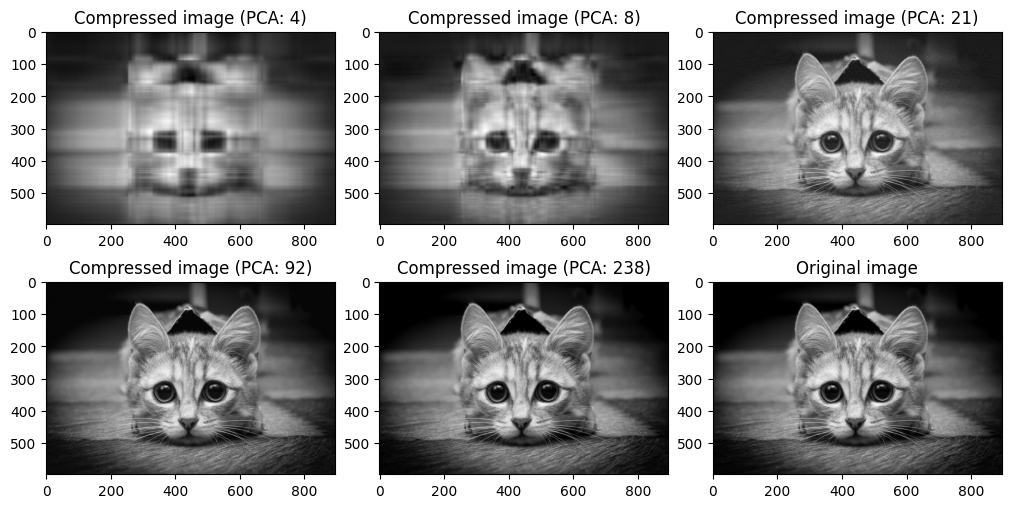

In [ ]:
# функция, которая сжимает изображение с заданным числом главных компонент
def compress_image(n_components, image):
    pca = PCA(n_components=n_components)
    image_compressed = pca.fit_transform(image)
    return pca.inverse_transform(image_compressed)

# сожмем изображения с полученным количество главных компонент
image_4 = compress_image(4, image)
image_8 = compress_image(8, image)
image_21 = compress_image(73, image)
image_92 = compress_image(254, image)
image_238 = compress_image(580, image)

fig, axes = plt.subplots(2,3, figsize=(10,5), constrained_layout=True)

axes[0][0].imshow(image_4, cmap='gray')
axes[0][0].set_title("Compressed image (PCA: 4)")

axes[0][1].imshow(image_8, cmap='gray')
axes[0][1].set_title("Compressed image (PCA: 8)")

axes[0][2].imshow(image_21, cmap='gray')
axes[0][2].set_title("Compressed image (PCA: 21)")

axes[1][0].imshow(image_92, cmap='gray')
axes[1][0].set_title("Compressed image (PCA: 92)")

axes[1][1].imshow(image_238, cmap='gray')
axes[1][1].set_title("Compressed image (PCA: 238)")

axes[1][2].imshow(image, cmap='gray')
axes[1][2].set_title("Original image")